In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import rdkit
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from mordred import Calculator, descriptors
from rdkit.Chem import rdFingerprintGenerator
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("data_compound.csv")
df

,sid,cid,smiles,bioactivity,type,value (nM)
0,316936203,118159182,C[C@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CC...,Active,IC50,0.0066
1,316936247,118159176,C[C@@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3C...,Active,IC50,0.0083
2,316936221,118159272,CC(C)NC1=NC2=C(CN(CC2)C(=O)C)N=C1N3CCC(CC3)C(C...,Active,IC50,0.0085
3,316936228,118159276,CC(C)NC1=NC2=C(CN(CC2)C)N=C1N3CCC(CC3)C(=O)C4=...,Active,IC50,0.0088
4,316936201,118159362,CN(C)C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CCC(...,Active,IC50,0.0091
...,...,...,...,...,...,...
1629,336857410,9966680,C1CN(C(=S)N1)C(=S)NC(=O)C2=CC=CC3=CC=CC=C32,Unspecified,IC50,100000.0000
1630,336857410,9966680,C1CN(C(=S)N1)C(=S)NC(=O)C2=CC=CC3=CC=CC=C32,Unspecified,IC50,100000.0000
1631,336857473,4526747,C1CN(C(=S)N1)C(=S)NC(=O)C2=CC=CC=C2,Unspecified,IC50,100000.0000
1632,336857473,4526747,C1CN(C(=S)N1)C(=S)NC(=O)C2=CC=CC=C2,Unspecified,IC50,100000.0000


In [11]:
df_hist = df[['cid','smiles','bioactivity', 'type', 'value (nM)']]
df_hist

,cid,smiles,bioactivity,type,value (nM)
0,118159182,C[C@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CC...,Active,IC50,0.0066
1,118159176,C[C@@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3C...,Active,IC50,0.0083
2,118159272,CC(C)NC1=NC2=C(CN(CC2)C(=O)C)N=C1N3CCC(CC3)C(C...,Active,IC50,0.0085
3,118159276,CC(C)NC1=NC2=C(CN(CC2)C)N=C1N3CCC(CC3)C(=O)C4=...,Active,IC50,0.0088
4,118159362,CN(C)C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CCC(...,Active,IC50,0.0091
...,...,...,...,...,...
1629,9966680,C1CN(C(=S)N1)C(=S)NC(=O)C2=CC=CC3=CC=CC=C32,Unspecified,IC50,100000.0000
1630,9966680,C1CN(C(=S)N1)C(=S)NC(=O)C2=CC=CC3=CC=CC=C32,Unspecified,IC50,100000.0000
1631,4526747,C1CN(C(=S)N1)C(=S)NC(=O)C2=CC=CC=C2,Unspecified,IC50,100000.0000
1632,4526747,C1CN(C(=S)N1)C(=S)NC(=O)C2=CC=CC=C2,Unspecified,IC50,100000.0000


In [12]:
df_hist = df_hist.drop_duplicates(keep='first', ignore_index=True)
df_hist

,cid,smiles,bioactivity,type,value (nM)
0,118159182,C[C@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CC...,Active,IC50,0.0066
1,118159176,C[C@@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3C...,Active,IC50,0.0083
2,118159272,CC(C)NC1=NC2=C(CN(CC2)C(=O)C)N=C1N3CCC(CC3)C(C...,Active,IC50,0.0085
3,118159276,CC(C)NC1=NC2=C(CN(CC2)C)N=C1N3CCC(CC3)C(=O)C4=...,Active,IC50,0.0088
4,118159362,CN(C)C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CCC(...,Active,IC50,0.0091
...,...,...,...,...,...
1158,118159345,CC1C2=C(CCN1S(=O)(=O)C)N=C(C(=N2)N3CCC(CC3)OC4...,Unspecified,IC50,98000.0000
1159,9879918,C1CN(C(=S)N1)C(=S)NC(=O)C2=CC3=CC=CC=C3C=C2,Unspecified,IC50,100000.0000
1160,9966680,C1CN(C(=S)N1)C(=S)NC(=O)C2=CC=CC3=CC=CC=C32,Unspecified,IC50,100000.0000
1161,4526747,C1CN(C(=S)N1)C(=S)NC(=O)C2=CC=CC=C2,Unspecified,IC50,100000.0000


In [13]:
df_hist.to_csv("drop_duplicates.csv", index=False)

In [14]:
df_hist = df_hist[df_hist["bioactivity"] != 'Unspecified']
df_hist

,cid,smiles,bioactivity,type,value (nM)
0,118159182,C[C@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CC...,Active,IC50,0.0066
1,118159176,C[C@@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3C...,Active,IC50,0.0083
2,118159272,CC(C)NC1=NC2=C(CN(CC2)C(=O)C)N=C1N3CCC(CC3)C(C...,Active,IC50,0.0085
3,118159276,CC(C)NC1=NC2=C(CN(CC2)C)N=C1N3CCC(CC3)C(=O)C4=...,Active,IC50,0.0088
4,118159362,CN(C)C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CCC(...,Active,IC50,0.0091
...,...,...,...,...,...
933,118159281,CC(C)NC1=NC2=C(CCN(C2)C(=O)C3CC3)N=C1N4CCC(CC4...,Inactive,IC50,340200.0000
934,118159155,CC(C)NC1=NC2=C(CN(CC2)C(=O)C)N=C1N3CCC(CC3)S(=...,Inactive,IC50,341500.0000
935,118159118,CC(C)NC1=NC2=C(CCN(C2)C(=O)C)N=C1N3CCN(CC3)CC4...,Inactive,IC50,362900.0000
936,118159228,CC(C)NC1=NC2=C(CCN(C2)C(=O)N3CCCC3)N=C1N4CCC(C...,Inactive,IC50,391000.0000


In [15]:
IC50_only = df_hist[df_hist['type']=='IC50'].reset_index(drop=True)
IC50_only['pIC50'] = 9 - np.log10(IC50_only['value (nM)'])
IC50_only = IC50_only.drop_duplicates(keep='first', ignore_index=True)
IC50_only

,cid,smiles,bioactivity,type,value (nM),pIC50
0,118159182,C[C@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CC...,Active,IC50,0.0066,11.180456
1,118159176,C[C@@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3C...,Active,IC50,0.0083,11.080922
2,118159272,CC(C)NC1=NC2=C(CN(CC2)C(=O)C)N=C1N3CCC(CC3)C(C...,Active,IC50,0.0085,11.070581
3,118159276,CC(C)NC1=NC2=C(CN(CC2)C)N=C1N3CCC(CC3)C(=O)C4=...,Active,IC50,0.0088,11.055517
4,118159362,CN(C)C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CCC(...,Active,IC50,0.0091,11.040959
...,...,...,...,...,...,...
579,118159281,CC(C)NC1=NC2=C(CCN(C2)C(=O)C3CC3)N=C1N4CCC(CC4...,Inactive,IC50,340200.0000,3.468266
580,118159155,CC(C)NC1=NC2=C(CN(CC2)C(=O)C)N=C1N3CCC(CC3)S(=...,Inactive,IC50,341500.0000,3.466609
581,118159118,CC(C)NC1=NC2=C(CCN(C2)C(=O)C)N=C1N3CCN(CC3)CC4...,Inactive,IC50,362900.0000,3.440213
582,118159228,CC(C)NC1=NC2=C(CCN(C2)C(=O)N3CCCC3)N=C1N4CCC(C...,Inactive,IC50,391000.0000,3.407823


c:\Users\SPoomYY\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x2000 with 0 Axes>

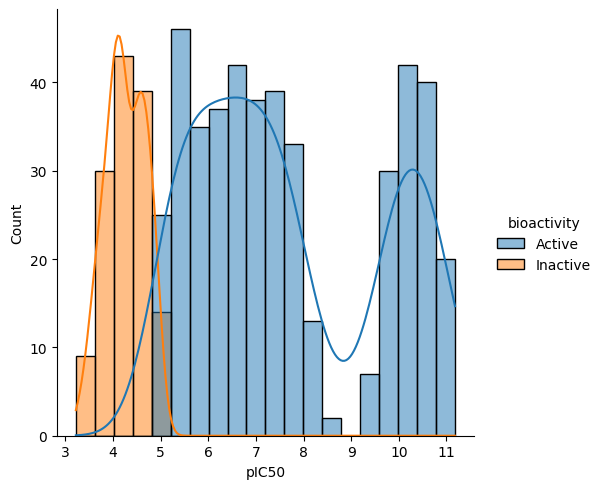

In [16]:
plt.figure(figsize=(20, 20))

sns.displot(IC50_only, bins=20, x='pIC50', hue='bioactivity', kde=True)
plt.show()

In [17]:
def canonical_smiles(smiles):
    mol_smiles = [Chem.MolFromSmiles(smi) for smi in smiles]
    smiles = [Chem.MolToSmiles(mol) for mol in mol_smiles]

    return smiles

In [18]:
CANNO_SMILES = canonical_smiles(IC50_only.smiles)
len(CANNO_SMILES)

584

In [19]:
IC50_only['smiles'] = CANNO_SMILES
IC50_only

,cid,smiles,bioactivity,type,value (nM),pIC50
0,118159182,CO[C@H](C)C(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4ccc...,Active,IC50,0.0066,11.180456
1,118159176,CO[C@@H](C)C(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4cc...,Active,IC50,0.0083,11.080922
2,118159272,CC(=O)N1CCc2nc(NC(C)C)c(N3CCC(C(F)c4ccc(F)cc4F...,Active,IC50,0.0085,11.070581
3,118159276,CC(C)Nc1nc2c(nc1N1CCC(C(=O)c3cc(Cl)ccc3F)CC1)C...,Active,IC50,0.0088,11.055517
4,118159362,CN(C)C(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4ccc(F)cc...,Active,IC50,0.0091,11.040959
...,...,...,...,...,...,...
579,118159281,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,Inactive,IC50,340200.0000,3.468266
580,118159155,COc1cccc(S(=O)(=O)C2CCN(c3nc4c(nc3NC(C)C)CCN(C...,Inactive,IC50,341500.0000,3.466609
581,118159118,CC(=O)N1CCc2nc(N3CCN(Cc4ccc(C#N)cc4F)CC3)c(NC(...,Inactive,IC50,362900.0000,3.440213
582,118159228,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,Inactive,IC50,391000.0000,3.407823


In [20]:
compounds = []

for _, smiles, bioactivity, pIC50 in IC50_only[['smiles', 'bioactivity', 'pIC50']].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), bioactivity, pIC50))
compounds[:5]

[(<rdkit.Chem.rdchem.Mol at 0x279e38e9ee0>, 'Active', 11.18045606445813),
 (<rdkit.Chem.rdchem.Mol at 0x279e38eb220>, 'Active', 11.080921907623926),
 (<rdkit.Chem.rdchem.Mol at 0x279e38ea3b0>, 'Active', 11.070581074285707),
 (<rdkit.Chem.rdchem.Mol at 0x279e38ead50>, 'Active', 11.05551732784983),
 (<rdkit.Chem.rdchem.Mol at 0x279e38ea8f0>, 'Active', 11.040958607678906)]

In [22]:
compounds2 = pd.DataFrame(compounds, columns=["Structure", "bioactivity", "pIC50"])
compounds2.head(5)

,Structure,bioactivity,pIC50
0,<rdkit.Chem.rdchem.Mol object at 0x00000279E38...,Active,11.180456
1,<rdkit.Chem.rdchem.Mol object at 0x00000279E38...,Active,11.080922
2,<rdkit.Chem.rdchem.Mol object at 0x00000279E38...,Active,11.070581
3,<rdkit.Chem.rdchem.Mol object at 0x00000279E38...,Active,11.055517
4,<rdkit.Chem.rdchem.Mol object at 0x00000279E38...,Active,11.040959


,cid,smiles,bioactivity,type,value (nM),pIC50,Structure
0,118159182,CO[C@H](C)C(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4ccc...,Active,IC50,0.0066,11.180456,
1,118159176,CO[C@@H](C)C(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4cc...,Active,IC50,0.0083,11.080922,

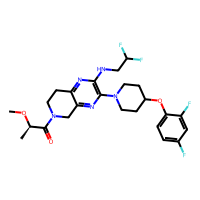
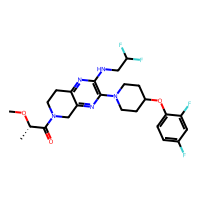

In [23]:
PandasTools.AddMoleculeColumnToFrame(IC50_only, 'smiles', 'Structure')
PandasTools.RenderImagesInAllDataFrames(True)
IC50_only.head(2)

In [25]:
def generate_mfpts(data):
    Mfpts = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048) for mol in data]
    return Mfpts


mfpts = generate_mfpts(IC50_only.Structure[:])
print("Number of compounds converted:", len(mfpts))
print("Fingerprint length per compound:", len(mfpts[0]))

Number of compounds converted: 584
Fingerprint length per compound: 2048


In [26]:
fp_name = [f'Bit_{i}' for i in range(2048)]
fp_bits = [list(l) for l in mfpts]
morganfp = pd.DataFrame(fp_bits, index=IC50_only.smiles, columns=fp_name)
morganfp.head()

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
smiles,,,,,,,,,,,,,,,,,,,,,
CO[C@H](C)C(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4ccc(F)cc4F)CC3)nc2C1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CO[C@@H](C)C(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4ccc(F)cc4F)CC3)nc2C1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CC(=O)N1CCc2nc(NC(C)C)c(N3CCC(C(F)c4ccc(F)cc4F)CC3)nc2C1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CC(C)Nc1nc2c(nc1N1CCC(C(=O)c3cc(Cl)ccc3F)CC1)CN(C)CC2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CN(C)C(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4ccc(F)cc4F)CC3)nc2C1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
def tanimoto_distance_matrix(fp_list):
    
    dissimilarity_matrix = []
    
    for i in range(1, len(fp_list)):
        
        similarities = DataStructs.BulkTanimotoSimilarity(fp_list[i], fp_list[:i])
        dissimilarity_matrix.extend([1 - x for x in similarities])
    return dissimilarity_matrix

In [28]:
sim = DataStructs.TanimotoSimilarity(mfpts[0], mfpts[1])
print(f"Tanimoto similarity: {sim:.2f}, distance: {1-sim:.2f}")

Tanimoto similarity: 1.00, distance: 0.00


In [29]:
tanimoto_distance_matrix(mfpts)[0:3]

[0.0, 0.48809523809523814, 0.48809523809523814]

In [30]:
n = len(mfpts)

elem_triangular_matr = (n * (n - 1)) / 2

print(
    f"Elements in the triangular matrix ({elem_triangular_matr:.0f}) ==",
    f"tanimoto_distance_matrix(mfpts) ({len(tanimoto_distance_matrix(mfpts))})",
)

Elements in the triangular matrix (170236) == tanimoto_distance_matrix(mfpts) (170236)


In [31]:
from rdkit.ML.Cluster import Butina

In [32]:
def cluster_mfpts(fingerprints, cutoff=0.3):

    distance_matrix = tanimoto_distance_matrix(mfpts)
    clusters = Butina.ClusterData(distance_matrix, len(mfpts), cutoff, isDistData=True)
    clusters = sorted(clusters, key=len, reverse=True)
    return clusters

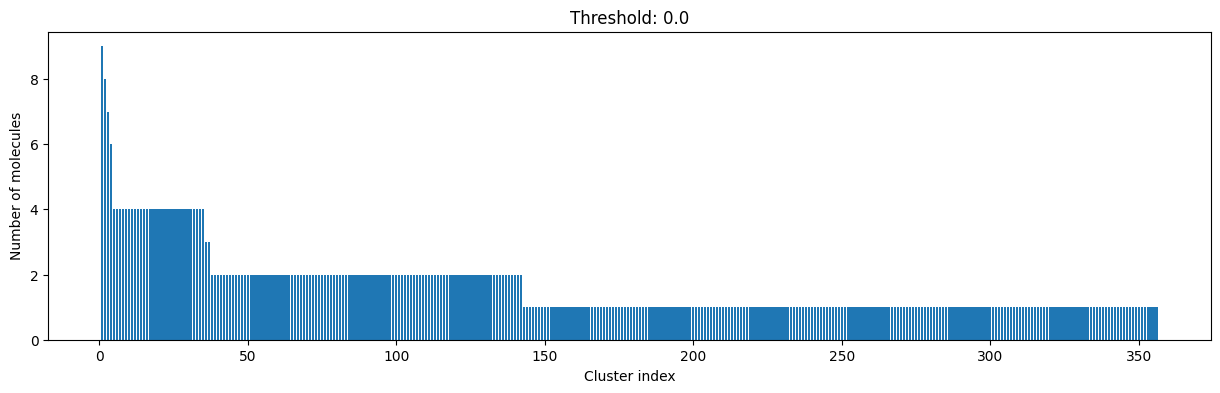

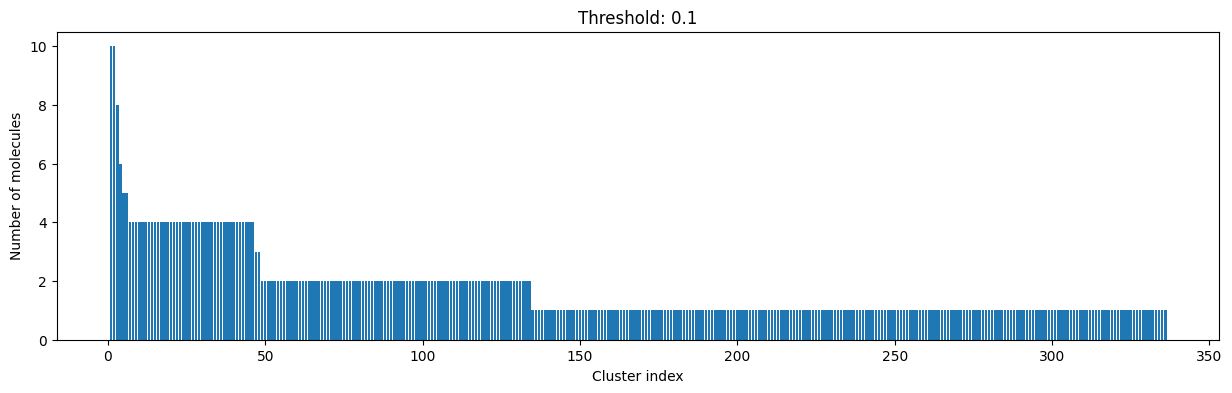

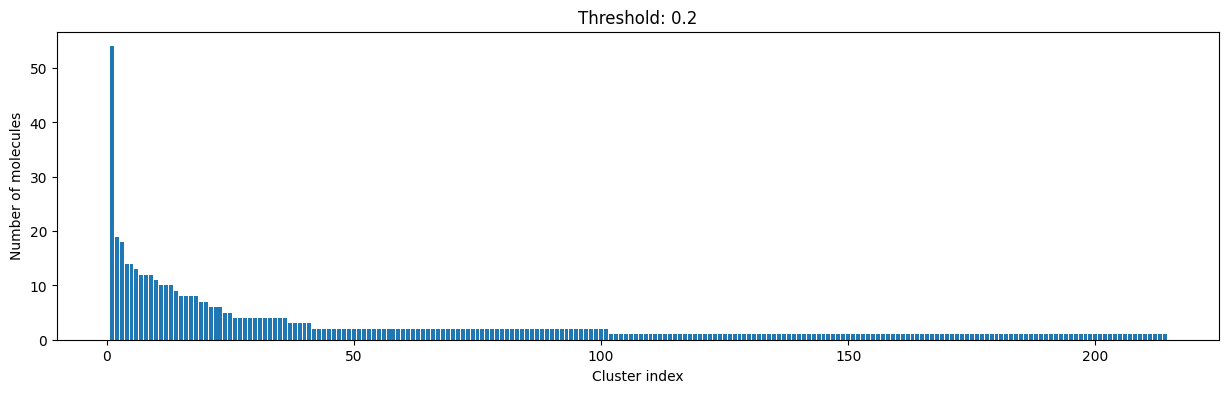

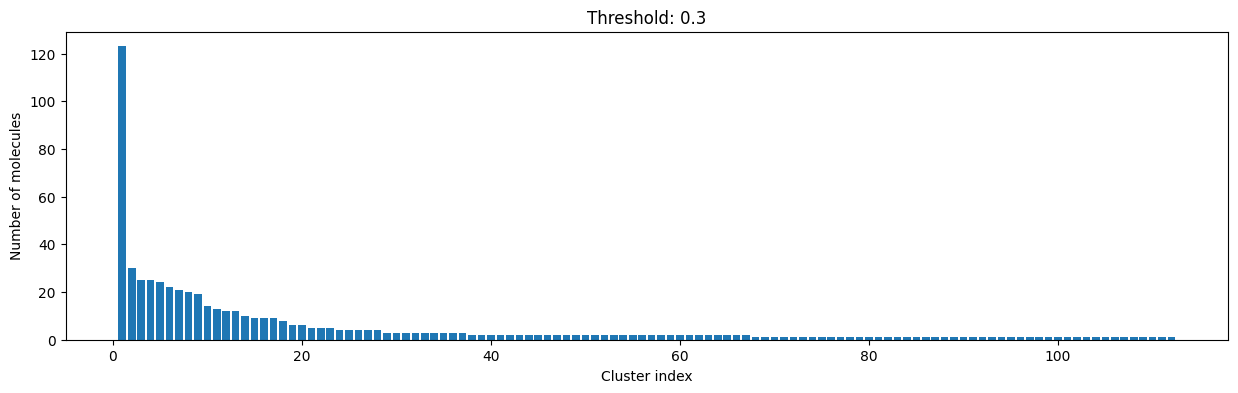

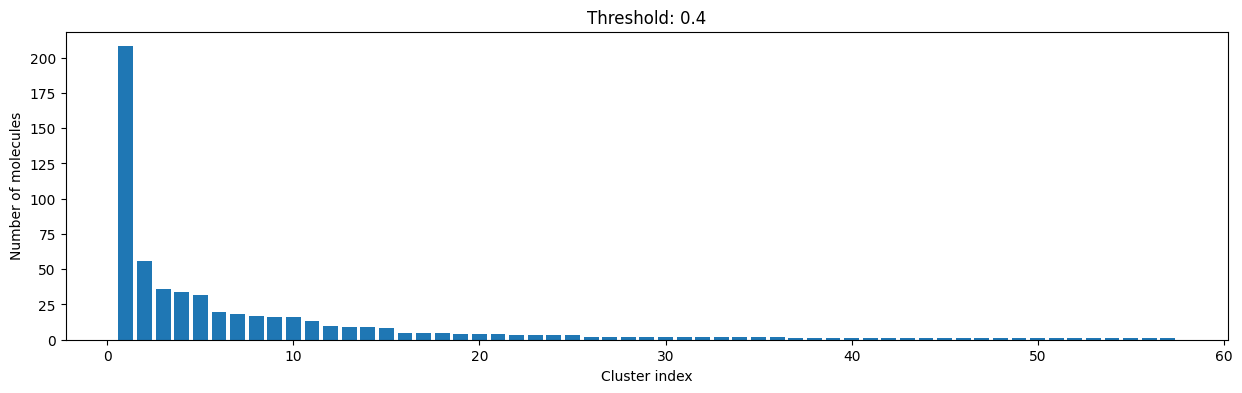

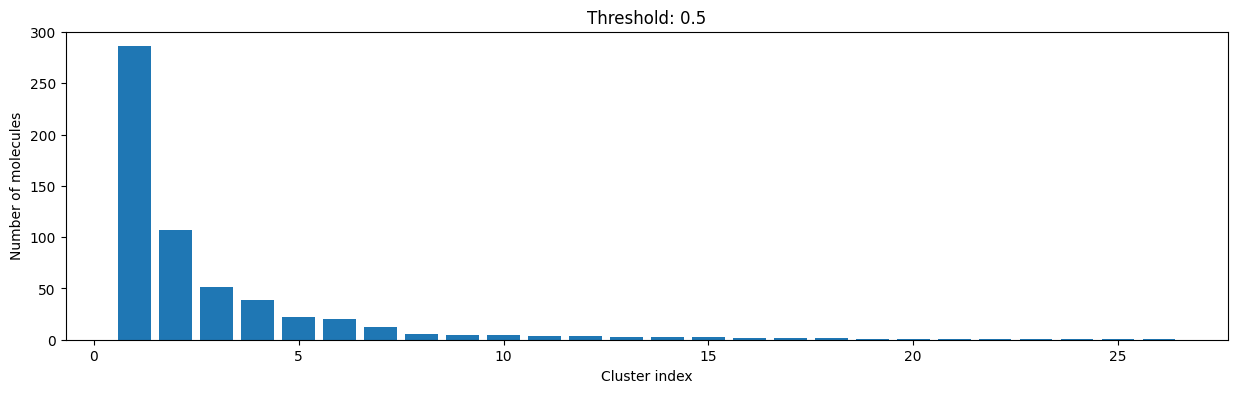

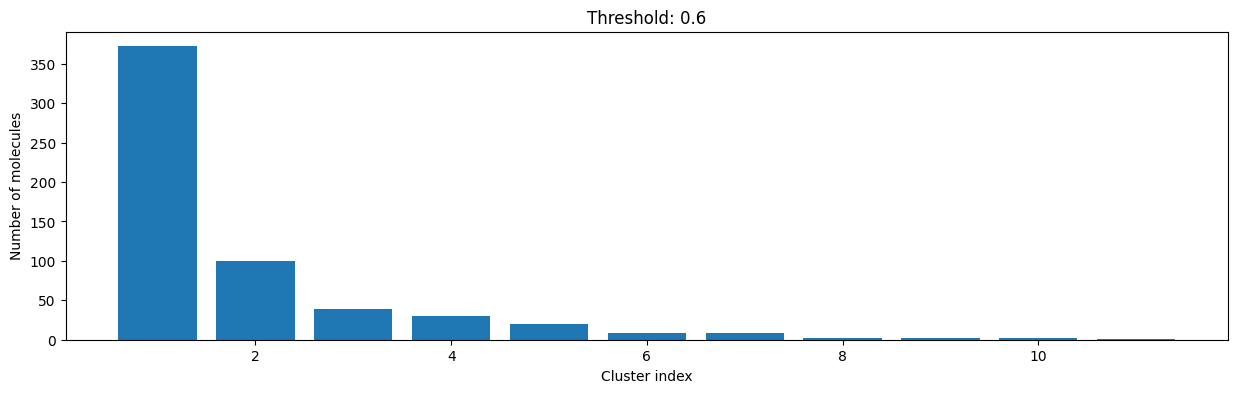

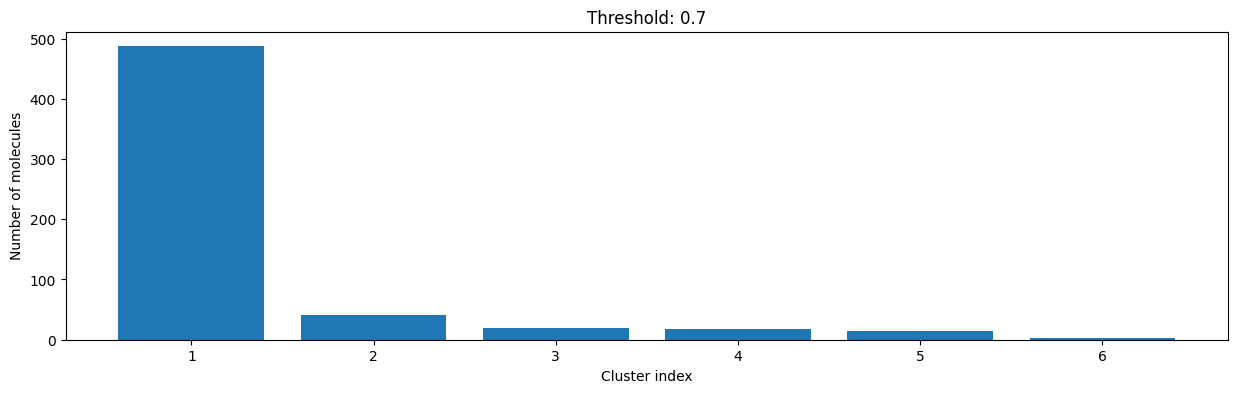

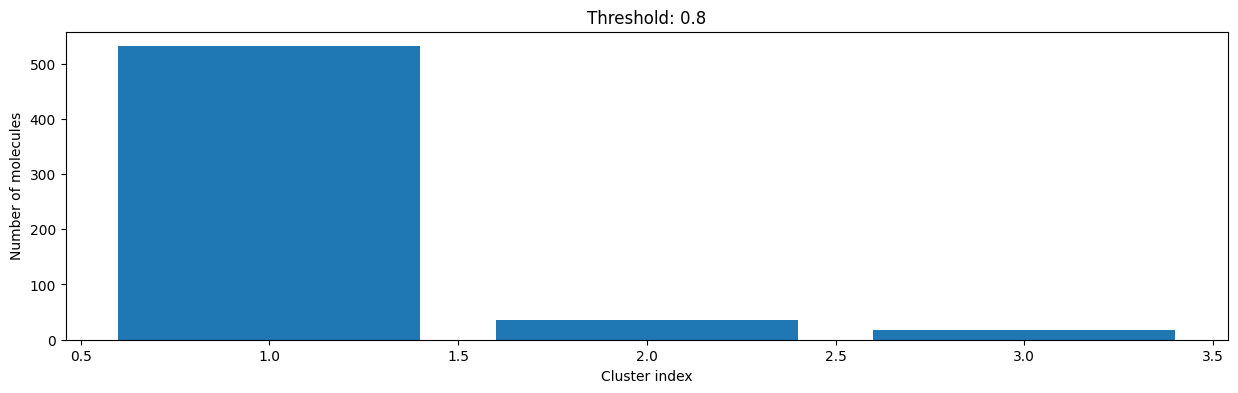

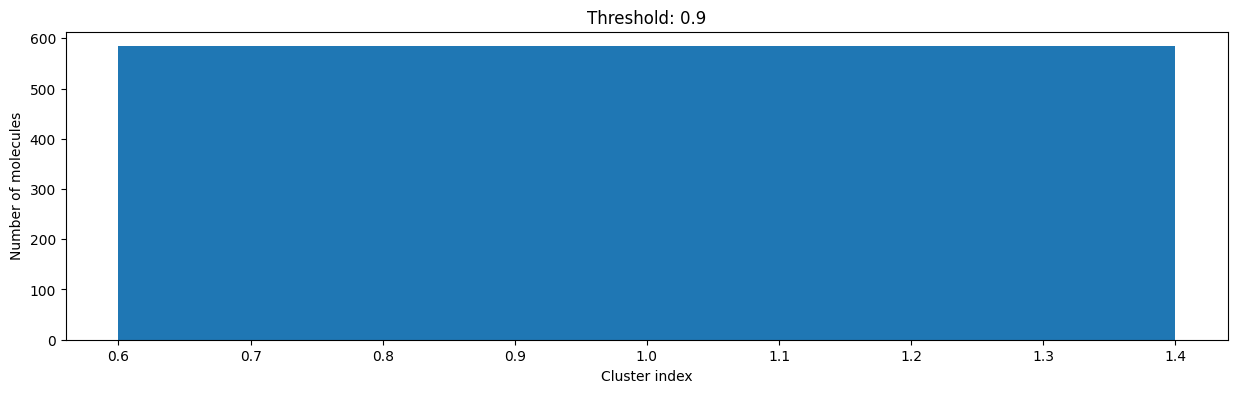

In [33]:
for cutoff in np.arange(0.0, 1.0, 0.1):
    clusters = cluster_mfpts(mfpts, cutoff=cutoff)
    fig, ax = plt.subplots(figsize=(15, 4))
    ax.set_title(f"Threshold: {cutoff:3.1f}")
    ax.set_xlabel("Cluster index")
    ax.set_ylabel("Number of molecules")
    ax.bar(range(1, len(clusters) + 1), [len(c) for c in clusters], lw=5)
    plt.show()

Number of clusters: 112 from 584 molecules at distance cut-off 0.30
Number of molecules in largest cluster: 123
Similarity between two random points in same cluster: 0.74
Similarity between two random points in different cluster: 0.57
# clusters with only 1 compound:  45
# clusters with >5 compounds:  20
# clusters with >25 compounds:  2
# clusters with >100 compounds:  1


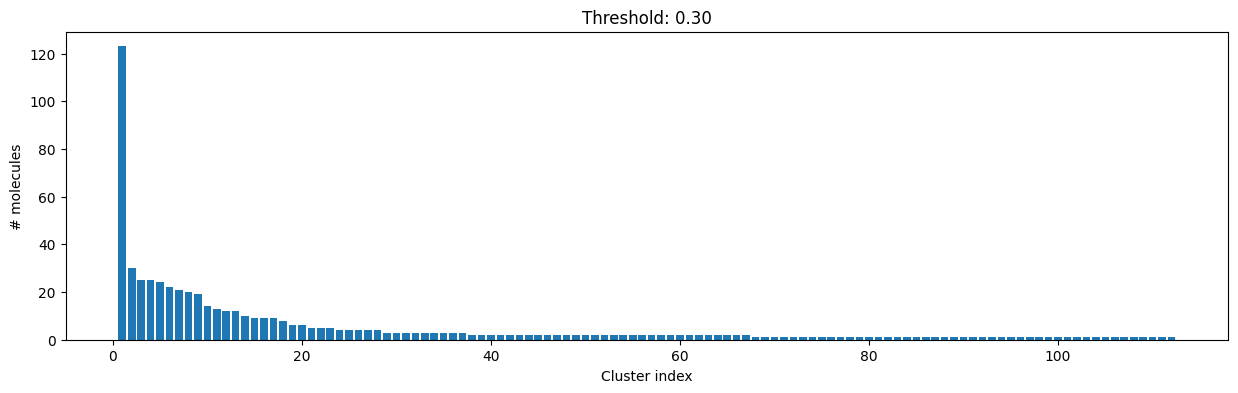

In [34]:
cutoff = 0.3
clusters = cluster_mfpts(mfpts, cutoff=cutoff)

fig, ax = plt.subplots(figsize=(15, 4))
ax.set_xlabel("Cluster index")
ax.set_ylabel("# molecules")
ax.bar(range(1, len(clusters) + 1), [len(c) for c in clusters])
ax.set_title(f"Threshold: {cutoff:3.2f}")

print(
    f"Number of clusters: {len(clusters)} from {len(compounds)} molecules at distance cut-off {cutoff:.2f}"
)
print("Number of molecules in largest cluster:", len(clusters[0]))
print(
    f"Similarity between two random points in same cluster: {DataStructs.TanimotoSimilarity(mfpts[clusters[0][0]], mfpts[clusters[0][1]]):.2f}"
)
print(
    f"Similarity between two random points in different cluster: {DataStructs.TanimotoSimilarity(mfpts[clusters[0][0]], mfpts[clusters[1][0]]):.2f}"
)

num_clust_g1 = sum(1 for c in clusters if len(c) == 1)
num_clust_g5 = sum(1 for c in clusters if len(c) > 5)
num_clust_g25 = sum(1 for c in clusters if len(c) > 25)
num_clust_g100 = sum(1 for c in clusters if len(c) > 100)

print("# clusters with only 1 compound: ", num_clust_g1)
print("# clusters with >5 compounds: ", num_clust_g5)
print("# clusters with >25 compounds: ", num_clust_g25)
print("# clusters with >100 compounds: ", num_clust_g100)

Ten molecules from largest cluster:


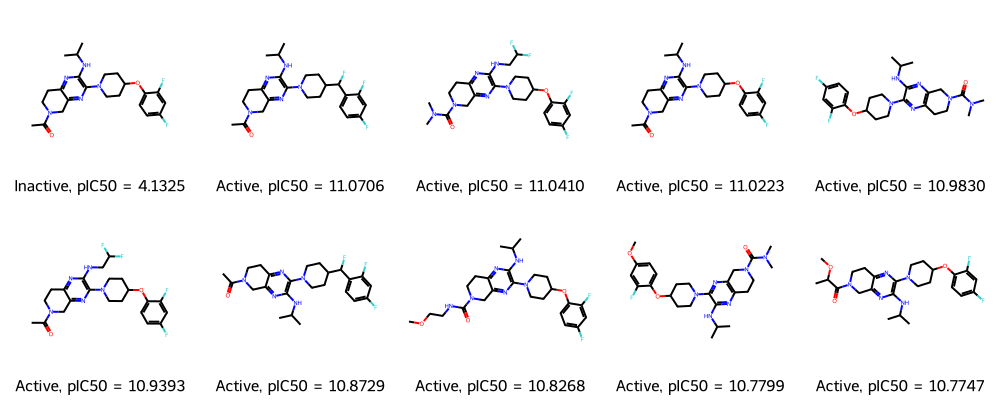

In [36]:
print("Ten molecules from largest cluster:")
# Draw molecules
Draw.MolsToGridImage(
    [compounds2["Structure"][i] for i in clusters[0][:10]],
    molsPerRow=5,
    #highlightAtomLists=[mol.GetSubstructMatch(core) for mol in compounds["Structure"]],
    #subImgSize=(450, 150),
    legends=[
        f"{compounds2['bioactivity'][i]}, pIC50 = {compounds2['pIC50'][i]:.4f}"
        for i in clusters[0][:10]]
)

Ten molecules from second largest cluster:


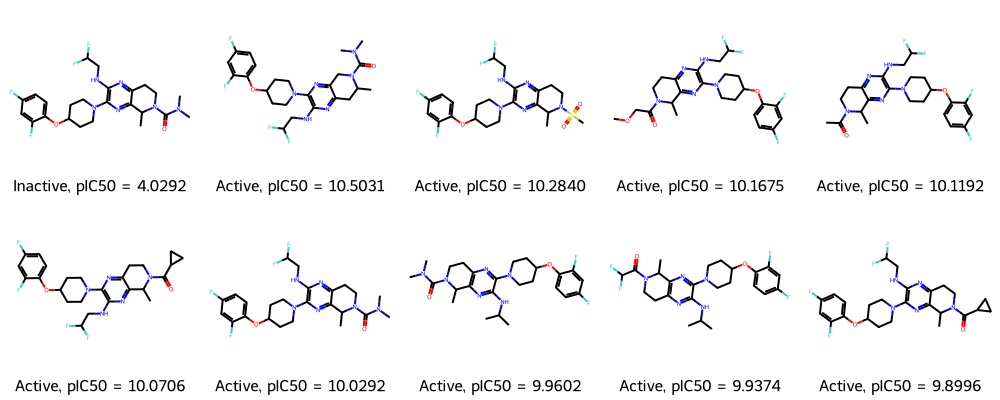

In [37]:
print("Ten molecules from second largest cluster:")
# Draw molecules
Draw.MolsToGridImage(
    [compounds2["Structure"][i] for i in clusters[1][:10]],
    molsPerRow=5,
    legends=[
        f"{compounds2['bioactivity'][i]}, pIC50 = {compounds2['pIC50'][i]:.4f}"
        for i in clusters[1][:10]]
)

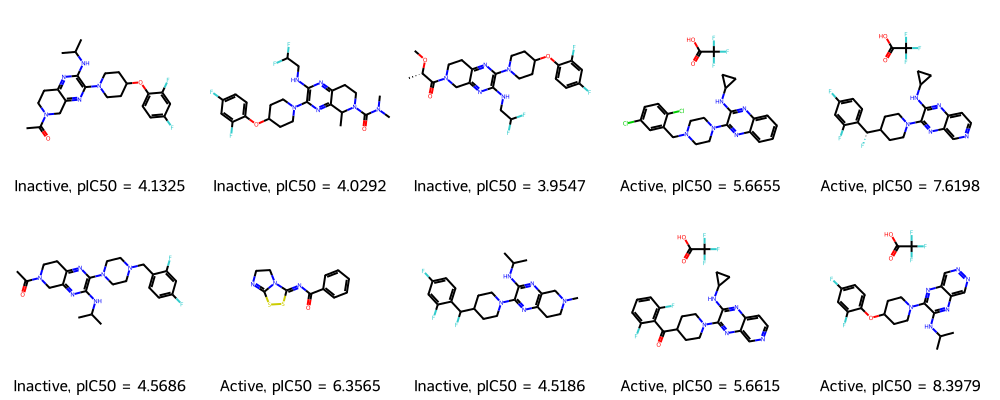

In [38]:
Draw.MolsToGridImage(
    [compounds2["Structure"][clusters[i][0]] for i in range(10)],
    molsPerRow=5,
    legends=[
        f"{compounds2['bioactivity'][clusters[i][0]]}, pIC50 = {compounds2['pIC50'][clusters[i][0]]:.4f}"
        for i in range(10)]
)